In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('.')
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import incense
from incense import ExperimentLoader
from cycler import cycler


## Finding experiments

To use `incense` we first have to instantiate an experiment loader that will enable us to query the database for specific runs.

In [4]:
loader = ExperimentLoader(
    mongo_uri="mongodb://localhost:27017", 
    db_name='sacred'
)

In [5]:
query = {#"$and": [
            #{"config.autoencoder_type": "nomal_dim_tied"},
          
        #{
        "$or": [
            {"_id": 4},  #0 
            {"_id": 8},  #1
            {"_id": 12}, #11
            {"_id": 14}, #10
            {"_id": 17}, #4
            {"_id": 23}, #3
            {"_id": 29}, #14
            {"_id": 30}, #13
            {"_id": 37}, #7
            {"_id": 39}, #6
            {"_id": 44}, #16
            {"_id": 48}, #15
            {"_id": 51}, #18
            {"_id": 54}, #17
            {"_id": 58}, #9
            {"_id": 62}, #8          
            {"_id": 67}, #2
            {"_id": 70}, #12 
            {"_id": 75}, #5


        ]}
        
        #]}
    
    
    
experiments=loader.find(query)
dtf=experiments.project(on=["config.targets_type","config.targets_type", "config.iteration", "config.autoencoder_type", "config.batch_size","artifacts"])


In [6]:
dtf

,targets_type,iteration,autoencoder_type,batch_size,artifacts
exp_id,,,,,
4,10_Targets,False,Over_dim,32,{'history_autoencoder': Artifact(name=history_...
8,Mnist,False,Over_dim,32,{'history_autoencoder': Artifact(name=history_...
12,Mnist,False,normal_dim,32,{'history_autoencoder': Artifact(name=history_...
14,10_Targets,False,normal_dim,128,{'history_autoencoder': Artifact(name=history_...
17,Mnist,False,Over_dim_iteration,256,{'history_autoencoder_iteration': Artifact(nam...
23,10_Targets,False,Over_dim_iteration,64,{'history_autoencoder_iteration': Artifact(nam...
29,Mnist,False,normal_dim_iteration,256,{'history_autoencoder_iteration': Artifact(nam...
30,10_Targets,False,normal_dim_iteration,256,{'history_autoencoder_iteration': Artifact(nam...
37,Mnist,False,Over_dim_tied,32,{'history_autoencoder': Artifact(name=history_...


In [7]:
dtf['sort']=[0,1,11,10,4,3,14,13,7,6,16,15,18,17,9,8,2,12,5]
dtf=dtf.sort_values(by=['sort'])
names=[" ".join(str(x) for x in dtf[['autoencoder_type','batch_size','targets_type']].iloc[n].values) for n in range(len(experiments))]
#names=[" ".join(str(x) for x in dtf[['batch_size','targets_type']].iloc[n].values) for n in range(len(experiments))]
#names=['normal_dim_tied ' + s for s in names]

# names=[" ".join(str(x) for x in dtf[['autoencoder_type']].iloc[n].values) for n in range(len(experiments))]
# names_2=[" ".join(str(x) for x in dtf[['batch_size','targets_type']].iloc[n].values) for n in range(len(experiments))]

# names=[ s[0] + '\n' + s[1]  for s in zip(names,names_2)]


dtf

,targets_type,iteration,autoencoder_type,batch_size,artifacts,sort
exp_id,,,,,,
4,10_Targets,False,Over_dim,32,{'history_autoencoder': Artifact(name=history_...,0
8,Mnist,False,Over_dim,32,{'history_autoencoder': Artifact(name=history_...,1
67,Noisy,False,Over_dim,128,{'history_autoencoder': Artifact(name=history_...,2
23,10_Targets,False,Over_dim_iteration,64,{'history_autoencoder_iteration': Artifact(nam...,3
17,Mnist,False,Over_dim_iteration,256,{'history_autoencoder_iteration': Artifact(nam...,4
75,Noisy,False,Over_dim_iteration,128,{'history_autoencoder': Artifact(name=history_...,5
39,10_Targets,False,Over_dim_tied,128,{'history_autoencoder': Artifact(name=history_...,6
37,Mnist,False,Over_dim_tied,32,{'history_autoencoder': Artifact(name=history_...,7
62,10_Targets,False,Over_dim_tied_iteration,256,{'history_autoencoder_iteration': Artifact(nam...,8


In [8]:
# names_1=[" ".join(str(x) for x in dtf[['autoencoder_type']].iloc[n].values) for n in range(len(experiments))]
# # names_1[1:3]="  "
# # names_1[4:6]="  "
# # names_1[7]="  "
# # names_1[9]="  "
# # names_1[11:13]="  "
# # names_1[14]="  "
# # names_1[16]="  "
# # names_1[18]="  "




# names_2=[" ".join(str(x) for x in dtf[['batch_size','targets_type']].iloc[n].values) for n in range(len(experiments))]

# names=[ s[0] + '\n' + s[1]  for s in zip(names_1,names_2)]
# names

names=[" ".join(str(x) for x in dtf[['batch_size','targets_type']].iloc[n].values) for n in range(len(experiments))]


In [9]:
def print_imm(imgs,name):
    n = len(imgs[0]) # how many digits we will display
    if name:
        plt.figure(figsize=(2,0.5))
        plt.text(0.1, 0.1, name, fontsize=12) 
        plt.show()
    plt.figure(figsize=(2*len(imgs[0]), 2 * len(imgs) + 2))
    for i in range(n):
        for j in range(len(imgs)):
            # display original
            ax = plt.subplot(len(imgs), n, i + 1 + j * n)
         
            if (j==0):
                plt.title(names[i])
            elif i==0 :
                plt.title(" ".join(str(x) for x in ["Iteration : ",j])) 
            
            plt.imshow(imgs[j][i].reshape(28, 28))
            
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [10]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: #5fba7d' if v else '' for v in is_max]

In [11]:
def highlight_max2(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

In [12]:
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: #5fba7d' if v else '' for v in is_max]

In [13]:
def highlight_min2(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: red' if v else '' for v in is_max]

In [14]:
names 

['32 10_Targets',
 '32 Mnist',
 '128 Noisy',
 '64 10_Targets',
 '256 Mnist',
 '128 Noisy',
 '128 10_Targets',
 '32 Mnist',
 '256 10_Targets',
 '256 Mnist',
 '128 10_Targets',
 '32 Mnist',
 '256 Noisy',
 '256 10_Targets',
 '256 Mnist',
 '64 10_Targets',
 '64 Mnist',
 '256 10_Targets',
 '128 Mnist']

In [15]:
def compare(data):
    evaluations_feature_classifier=[]
    autoencoder=[]
    predictions=[]
    pickle_artifact=[]
    
   
    for exp in range(dtf.shape[0]):
        #print(exp.id,exp.config)
        pickle_artifact = dtf.iloc[exp].artifacts[data].as_type(incense.artifact.PickleArtifact)
        predictions=pd.read_pickle(pickle_artifact.file,compression='gzip')
        
       
        evaluations_feature_classifier.append(predictions['evaluations_feature_classifier'])
        autoencoder.append(predictions['evaluations_autoencoder'])
        

    print(data)
 
    if dtf.shape[0]==12:
        plt.rc('axes', prop_cycle=(cycler('color', ['r','g','b','y', 'r', 'g', 'b', 'y','r','g','b','y']) +
                               cycler('linestyle', ['-','-','-','-','--','--','--','--',':',':',':',':'])))
    elif dtf.shape[0]==10:
        plt.rc('axes', prop_cycle=(cycler('color', ['r','g','b','y', 'r', 'g', 'b', 'y','r','g']) +
                               cycler('linestyle', ['-','-','-','-','--','--','--','--',':',':'])))
    else:
        plt.rc('axes', prop_cycle=(cycler('color', ['r','g','b','y', 'r', 'g', 'b', 'y']) +
                               cycler('linestyle', ['-','-','-','-','--','--','--','--'])))
    
    fig=plt.figure(figsize=(30,5))    

 
    
    ax=plt.subplot(1, 3,1)
    ax.set_ylim(0,1)
    plt.title("Accuracy over iterations evaluations_feature_classifier") 
    i=0
    for exp in evaluations_feature_classifier:
        plt.plot([item[1] for item in exp], label=names[i])
        
        i=i+1
    #plt.legend()
    
    
    ax=plt.subplot(1, 3,2)
    plt.title("Loss over iterations autoencoder") 
    i=0
    max_value=0
    for exp in autoencoder:
        sublist=[item[0] for item in exp]
        plt.plot(sublist, label=names[i])
        i=i+1
        n = max(sublist)
        if n > max_value: max_value = n
        sublist=[]

    
    ax.set_ylim(0,min(10,(max_value+0.05)))   

    #plt.legend()
    
  
    
    
    ax=plt.subplot(1, 3,3)
    plt.title("MAE over iterations autoencoder") 
    i=0
    max_value=0
    for exp in autoencoder:
        sublist=[item[2] for item in exp]
        plt.plot(sublist, label=names[i])
        i=i+1
        n = max(sublist)
        if n > max_value: max_value = n
        sublist=[]

    
    ax.set_ylim(0,min(10,(max_value+0.05)))  
    #plt.legend()
    
    fig.legend(names)
    plt.show()
    
    df=pd.DataFrame([[item[1] for item in sublist] for sublist in evaluations_feature_classifier], index =names).T
    display(df.style.apply(highlight_max,axis=1,subset=names[0:4]).apply(highlight_max,axis=1,subset=names[4:8]).apply(highlight_max,axis=1,subset=names[8:12]).apply(highlight_max2,axis=1).set_caption("Accuracy over iterations evaluations_feature_classifier"))
    df=[]
    
    df=pd.DataFrame([[item[0] for item in sublist] for sublist in autoencoder], index =names).T
    display(df.style.apply(highlight_min,axis=1,subset=names[0:4]).apply(highlight_min,axis=1,subset=names[4:8]).apply(highlight_min,axis=1,subset=names[8:12]).apply(highlight_min2,axis=1).set_caption("Loss over iterations autoencoder"))
    df=[]
    
    df=pd.DataFrame([[item[2] for item in sublist] for sublist in autoencoder], index =names).T
    display(df.style.apply(highlight_min,axis=1,subset=names[0:4]).apply(highlight_min,axis=1,subset=names[4:8]).apply(highlight_min,axis=1,subset=names[8:12]).apply(highlight_min2,axis=1).set_caption("MAE over iterations autoencoder"))
    df=[]
    
    

In [26]:
#name_list=['predictions_df_0','predictions_df_10','predictions_df_20','predictions_df_30','predictions_df_40','predictions_df_50','predictions_df_60','predictions_df_70','predictions_df_80','predictions_df_90','predictions_df_100']
name_list=['predictions_df_0','predictions_df_40','predictions_df_60','predictions_df_80','predictions_df_100']
name_list_plot=[' 0',' 0.4',' 0.6',' 0.8',' 1']
exp_names=['Over_dim','Over_dim_iteration','Over_dim_tied','Over_dim_tied_iteration','normal_dim','normal_dim_iteration','nomal_dim_tied','nomal_dim_tied_iteration']
#name_list=['predictions_df_90','predictions_df_100']

Red best overall, and also best of subset. Bes means for accuracy max, rest min.
Green best of subset.

In [17]:
for exp in range(0,2+1):
    print(names[exp])

32 10_Targets
32 Mnist
128 Noisy


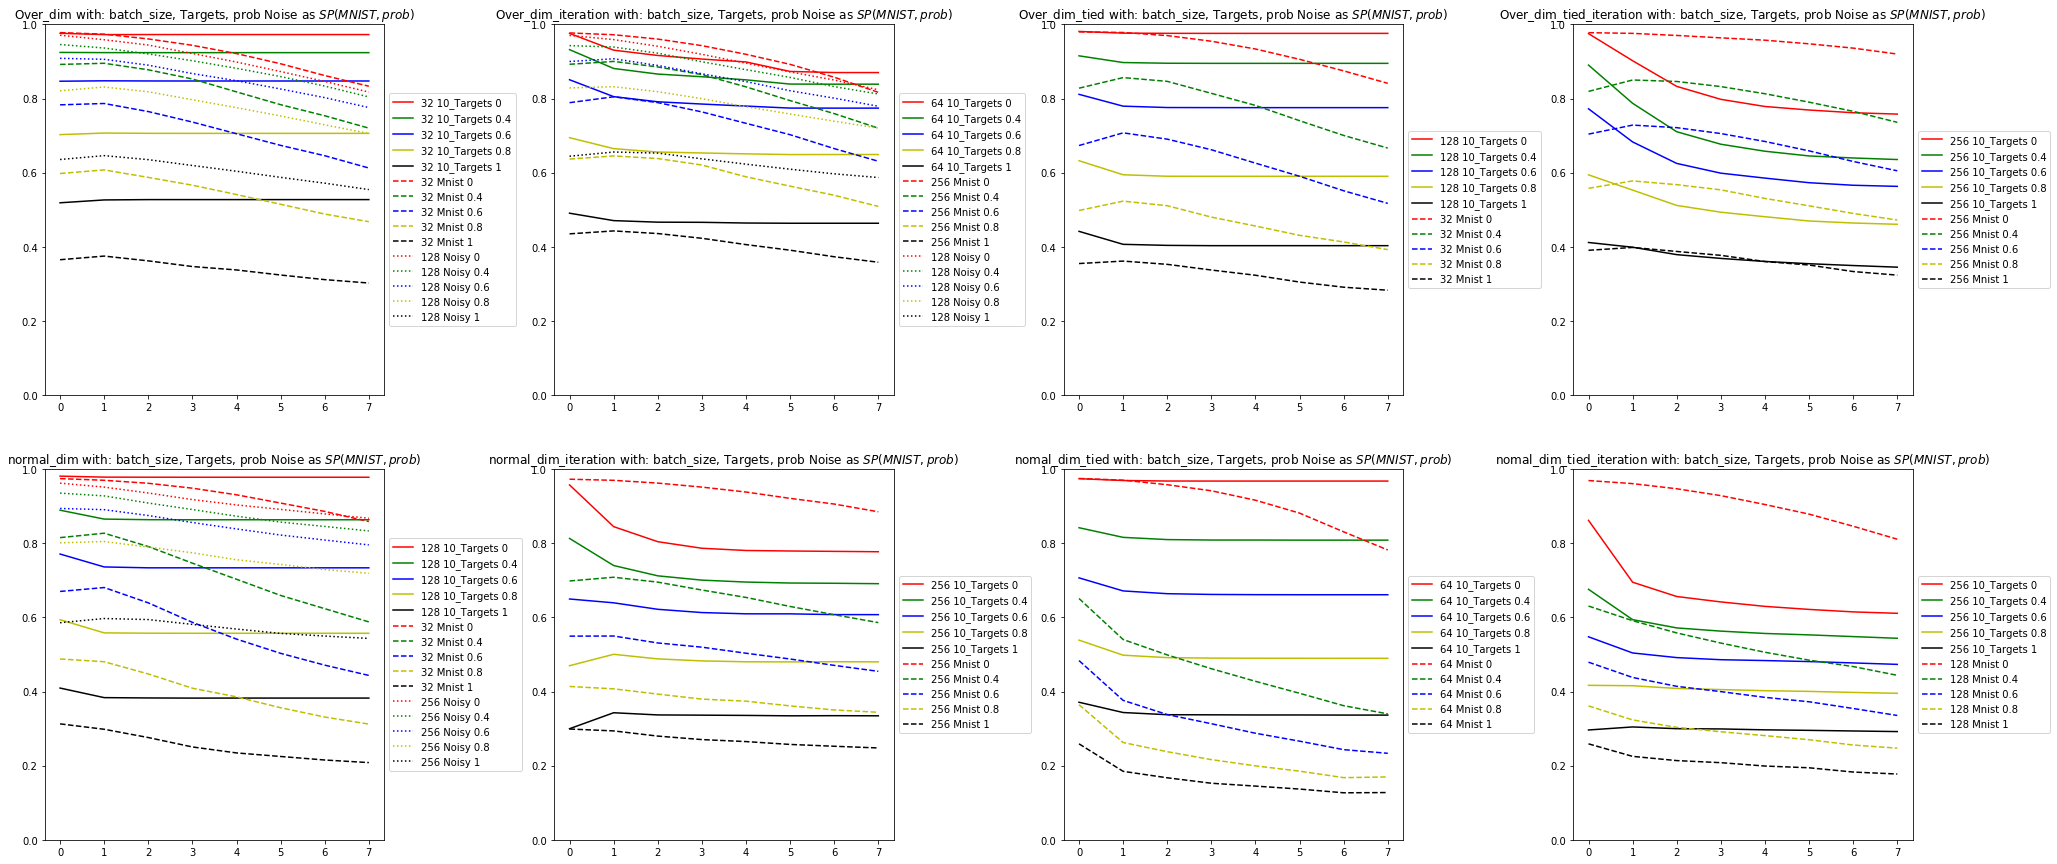

In [29]:
start=0
stop=2

config=[(0,2),(3,5),(6,7),(8,9),(10,12),(13,14),(15,16),(17,18)]

fig=plt.figure(figsize=(35,15))    

#y=len(config)/2
for count,co in enumerate(config,1):
    start=co[0]
    stop=co[1]
    list_evaluations_feature_classifier=[]
    list_autoencoder=[]
    list_names=[]

    for exp in range(start,stop+1):

        evaluations_feature_classifier=[]
        autoencoder=[]
        nammmes=[]
        for data in name_list:
            predictions=[]
            pickle_artifact=[]

            #print(names[exp])
            pickle_artifact = dtf.iloc[exp].artifacts[data].as_type(incense.artifact.PickleArtifact)
            predictions=pd.read_pickle(pickle_artifact.file,compression='gzip')
            nammmes.append(names[exp])

            evaluations_feature_classifier.append(predictions['evaluations_feature_classifier'])
            autoencoder.append(predictions['evaluations_autoencoder'])

        list_evaluations_feature_classifier.append(evaluations_feature_classifier)
        list_autoencoder.append(autoencoder)
        list_names.append(nammmes)


    plt.rc('axes', prop_cycle=(cycler('color', ['r','g','b','y','k','r','g','b','y','k','r','g','b','y','k',]) +
                                   cycler('linestyle', ['-','-','-','-','-','--','--','--','--','--',':',':',':',':',':'])))



    ax = plt.subplot(2, 4, count)

    i=0
    for exp,exp_name in zip(list_evaluations_feature_classifier,list_names):
        i=i+1
        for inde,noise_level in enumerate(zip(exp,exp_name)):
                plt.plot([item[1] for item in noise_level[0]], label=(noise_level[1]+name_list_plot[inde]))

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.set_ylim(0,1)
    ax.set_title(exp_names[count-1] + ' with: batch_size, Targets, prob Noise as $SP(MNIST, prob)$')

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
stopit

In [ ]:
for index in name_list:
    compare(index)

In [ ]:
# name_list=['predictions_df_0']

# for data in name_list:
#     df=[]
#     plt.figure(figsize=(2,0.5))
#     plt.text(0.1, 0.1, data, fontsize=12) 
#     plt.show()
#     num=['7','2']
#     df=pd.concat([pd.read_pickle(dtf.iloc[exp].artifacts[data].as_type(incense.artifact.PickleArtifact).file,compression='gzip')['predictions'] for exp in range(dtf.shape[0])],axis=1,keys=names)
#     for i in range(2):
#         print_imm(np.array(df.applymap(lambda x: x[i])),num[i])
#     df=[]

In [ ]:
# name_list=['predictions_df_40']

# for data in name_list:
#     df=[]
#     plt.figure(figsize=(2,0.5))
#     plt.text(0.1, 0.1, data, fontsize=12) 
#     plt.show()
#     num=['7','2']
#     df=pd.concat([pd.read_pickle(dtf.iloc[exp].artifacts[data].as_type(incense.artifact.PickleArtifact).file,compression='gzip')['predictions'] for exp in range(dtf.shape[0])],axis=1,keys=names)
#     for i in range(2):
#         print_imm(np.array(df.applymap(lambda x: x[i])),num[i])
#     df=[]

In [ ]:
# name_list=['predictions_df_60']

# for data in name_list:
#     df=[]
#     plt.figure(figsize=(2,0.5))
#     plt.text(0.1, 0.1, data, fontsize=12) 
#     plt.show()
#     num=['7','2']
#     df=pd.concat([pd.read_pickle(dtf.iloc[exp].artifacts[data].as_type(incense.artifact.PickleArtifact).file,compression='gzip')['predictions'] for exp in range(dtf.shape[0])],axis=1,keys=names)
#     for i in range(2):
#         print_imm(np.array(df.applymap(lambda x: x[i])),num[i])
#     df=[]

In [ ]:
# name_list=['predictions_df_80']

# for data in name_list:
#     df=[]
#     plt.figure(figsize=(2,0.5))
#     plt.text(0.1, 0.1, data, fontsize=12) 
#     plt.show()
#     num=['7','2']
#     df=pd.concat([pd.read_pickle(dtf.iloc[exp].artifacts[data].as_type(incense.artifact.PickleArtifact).file,compression='gzip')['predictions'] for exp in range(dtf.shape[0])],axis=1,keys=names)
#     for i in range(2):
#         print_imm(np.array(df.applymap(lambda x: x[i])),num[i])
#     df=[]

In [ ]:
name_list=['predictions_df_100']

for data in name_list:
    df=[]
    plt.figure(figsize=(2,0.5))
    plt.text(0.1, 0.1, data, fontsize=12) 
    plt.show()
    num=['7','2']
    df=pd.concat([pd.read_pickle(dtf.iloc[exp].artifacts[data].as_type(incense.artifact.PickleArtifact).file,compression='gzip')['predictions'] for exp in range(dtf.shape[0])],axis=1,keys=names)
    for i in range(2):
        print_imm(np.array(df.applymap(lambda x: x[i])),num[i])
    df=[]